In [1]:

import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
# Add the scripts directory to the Python path
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))
from plot import (
    plot_histogram, 
    plot_scatter, 
    plot_time_series, 
    plot_boxplot,
    plot_correlation_matrix
)

# Now you can import the functions
from utils import (
    read_csv_file,
    calculate_summary_statistics,
    calculate_correlation_matrix,
    detect_outliers,
    convert_to_datetime,
    calculate_daily_returns,
    calculate_moving_average,
)



# Load the CSV file into a DataFrame
data_info = read_csv_file("Data/yfinance_data/TSLA_historical_data.csv")
df = data_info["data"]
print("Row count: ",data_info["row_count"])

Row count:  3545


Summary Statistics:
                                 Date         Open         High          Low  \
count                           3545  3545.000000  3545.000000  3545.000000   
mean   2017-07-12 17:17:02.623413248    75.505658    77.159237    73.743492   
min              2010-06-29 00:00:00     1.076000     1.108667     0.998667   
25%              2014-01-06 00:00:00    11.516667    11.861333    11.216667   
50%              2017-07-13 00:00:00    17.463333    17.688667    17.100000   
75%              2021-01-20 00:00:00   161.880005   165.333328   158.360001   
max              2024-07-30 00:00:00   411.470001   414.496674   405.666656   
std                              NaN   102.530489   104.806516   100.051787   

             Close    Adj Close        Volume  Dividends  Stock Splits  
count  3545.000000  3545.000000  3.545000e+03     3545.0   3545.000000  
mean     75.487264    75.487264  9.699708e+07        0.0      0.002257  
min       1.053333     1.053333  1.777500e+06   

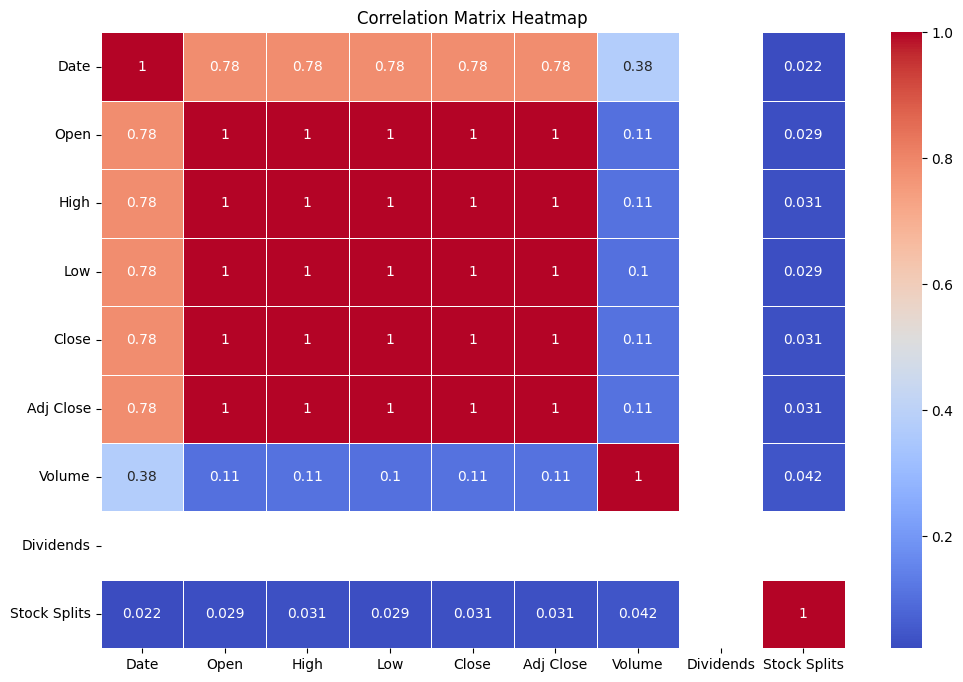

Outliers in 'Close' column:
            Date        Open        High         Low       Close   Adj Close  \
2856 2021-11-01  381.666656  403.250000  372.886658  402.863342  402.863342   
2857 2021-11-02  386.453339  402.863342  382.000000  390.666656  390.666656   
2858 2021-11-03  392.443329  405.130005  384.206665  404.619995  404.619995   
2859 2021-11-04  411.470001  414.496674  405.666656  409.970001  409.970001   
2860 2021-11-05  409.333344  413.290009  402.666656  407.363342  407.363342   
2861 2021-11-08  383.263336  399.000000  377.666656  387.646667  387.646667   
2899 2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   

         Volume  Dividends  Stock Splits  
2856  168146100        0.0           0.0  
2857  128213400        0.0           0.0  
2858  103885500        0.0           0.0  
2859   76192200        0.0           0.0  
2860   64886400        0.0           0.0  
2861  100337100        0.0           0.0  
2899  103931400        0.0           

In [2]:
# Convert 'Date' column to datetime
data = convert_to_datetime(df, 'Date')

# Calculate summary statistics
summary_stats = calculate_summary_statistics(data)
print("Summary Statistics:\n", summary_stats)

# Calculate correlation matrix
correlation_matrix = calculate_correlation_matrix(data)
print("Correlation Matrix:\n", correlation_matrix)
plot_correlation_matrix(data)
# Detect outliers in the 'Close' column
outliers = detect_outliers(data, 'Close')
print("Outliers in 'Close' column:\n", outliers)

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')
print("Daily Returns:\n", data[['Date', 'Close', 'Daily_Returns']].head())

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)
print("20-day Moving Average:\n", data[['Date', 'Close', 'MA_20']].head())

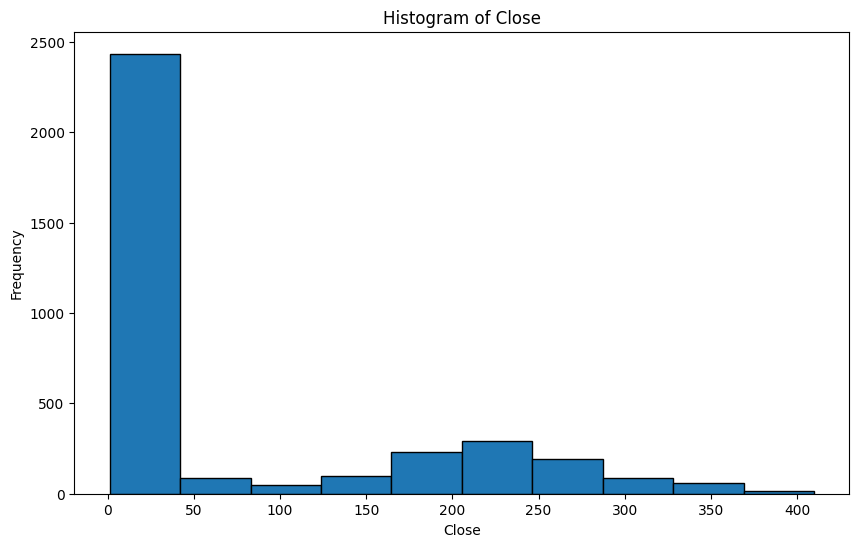

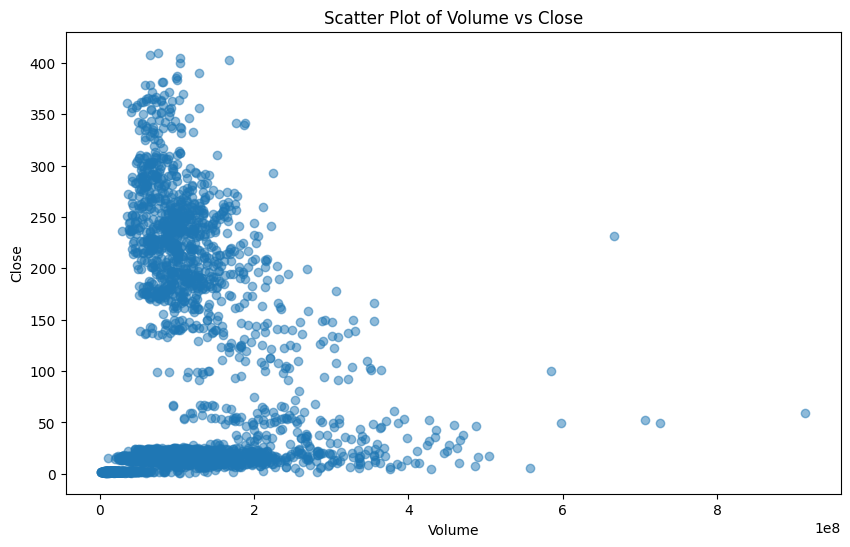

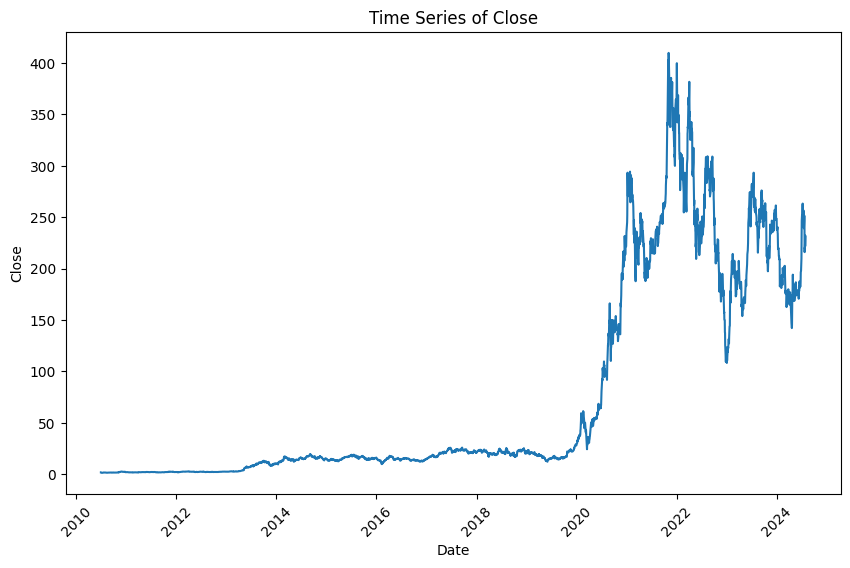

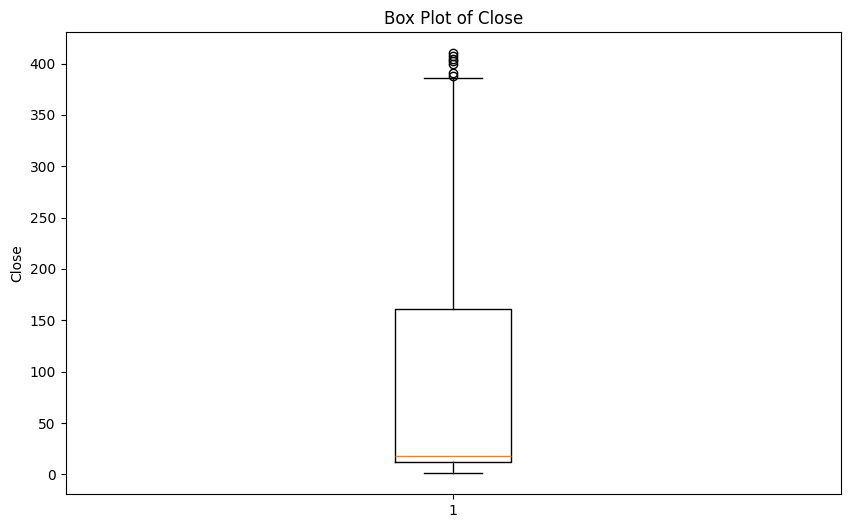

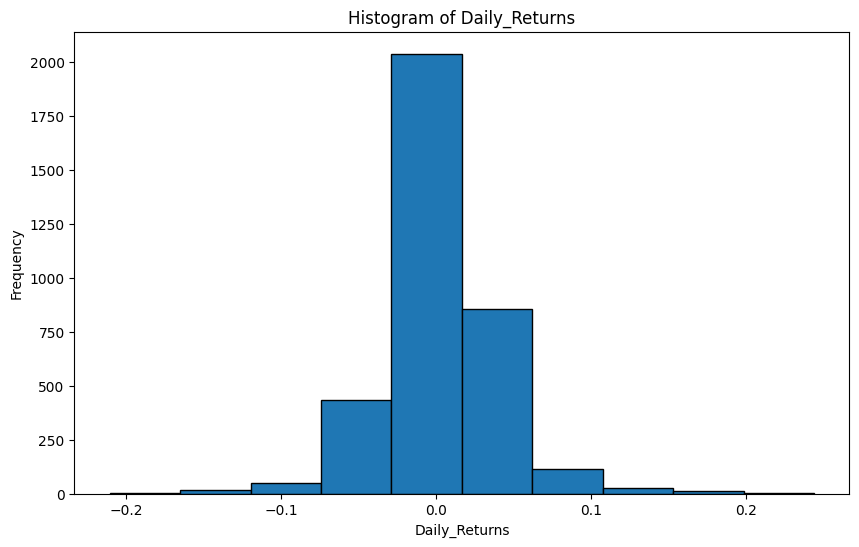

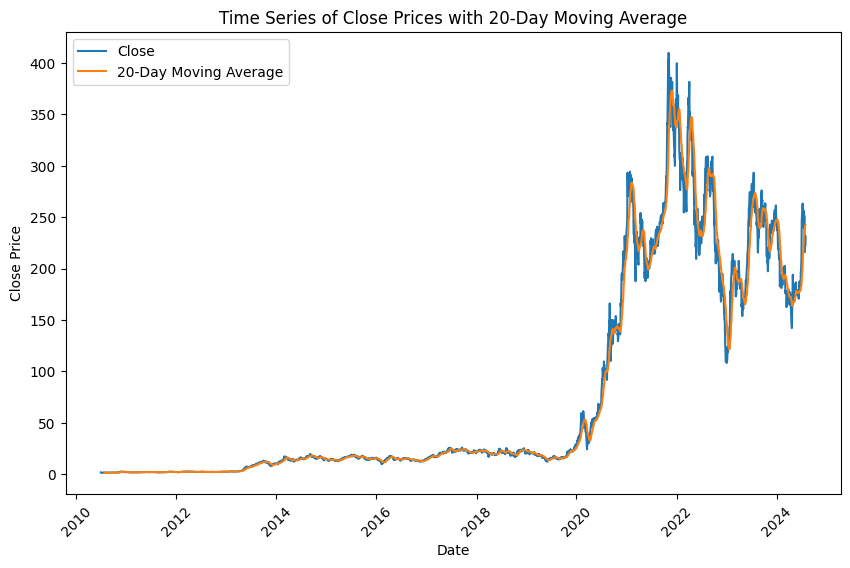

In [3]:

# Convert 'Date' column to datetime
data = convert_to_datetime(data, 'Date')

# Plot histogram of 'Close' prices
plot_histogram(data, 'Close')

# Plot scatter plot of 'Volume' vs 'Close'
plot_scatter(data, 'Volume', 'Close')

# Plot time series of 'Close' prices
plot_time_series(data, 'Date', 'Close')

# Plot box plot of 'Close' prices
plot_boxplot(data, 'Close')

# Calculate daily returns for the 'Close' column
data = calculate_daily_returns(data, 'Close')

# Plot histogram of daily returns
plot_histogram(data, 'Daily_Returns')

# Calculate 20-day moving average for the 'Close' column
data = calculate_moving_average(data, 'Close', 20)

# Plot time series of 'Close' prices with 20-day moving average
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['MA_20'], label='20-Day Moving Average')
plt.title('Time Series of Close Prices with 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()
